In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
print(os.listdir())

['Untitled5.ipynb', 'miniconda3', '.ipynb_checkpoints', 'eda .ipynb', '.bash_history', 'miniconda3~', 'ipl aouction.ipynb', 'IPL_Squad_2023_Auction_Dataset.csv', 'Untitled20.ipynb', 'Downloads', 'numpy.ipynb', '.conda', 'Cleaned_DS_Jobs.csv', 'Untitled15.ipynb', 'cleaned - cleaned.csv', '.wget-hsts', 'customer_data (1).csv', 'janhvi dap class.ipynb', '.vboxclient-hostversion-tty2-control.pid', '.gnupg', 'Templates', '.config', 'DAPproject 2.ipynb', '.local', '71 Centuries of Virat Kohli (1).csv', 'audible_uncleaned.csv', 'Untitled7.ipynb', '.pgadmin', 'Untitled1.ipynb', '.vboxclient-draganddrop-tty2-control.pid', 'Data Analytics Assignment.xlsx', 'train.csv', 'Untitled16.ipynb', '.vboxclient-vmsvga-session-tty2-control.pid', 'lab2.1AB', 'cache', 'Deep Tech Report-Latest_Course Complete__Table (10)(6).csv', 'Untitled11.ipynb', 'AQI Data Set.csv', 'Untitled9.ipynb', '.ipython', 'Pictures', 'Untitled6.ipynb', '.vboxclient-draganddrop-tty2-service.pid', 'Untitled8.ipynb', 'Documents', 'jan

In [5]:
data=pd.read_csv('AQI-and-Lat-Long-of-Countries.csv')
print(data.head())

   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         41             1                5              1               41   
3         66             1               39              2               66   
4         34             1               34              0               20   

       lat      lng  
0  44.7444  44.2031  
1  -5.2900 -44.4900  
2 -11.2958 -41.9869  
3  37.1667  15.1833  
4  53.0167  20.8833  


# handle missing value, rename column and check data types

In [6]:
data=data.dropna()
data.columns=[col.strip().lower()for col in data.columns]

# EDA visualizing relationship between variables

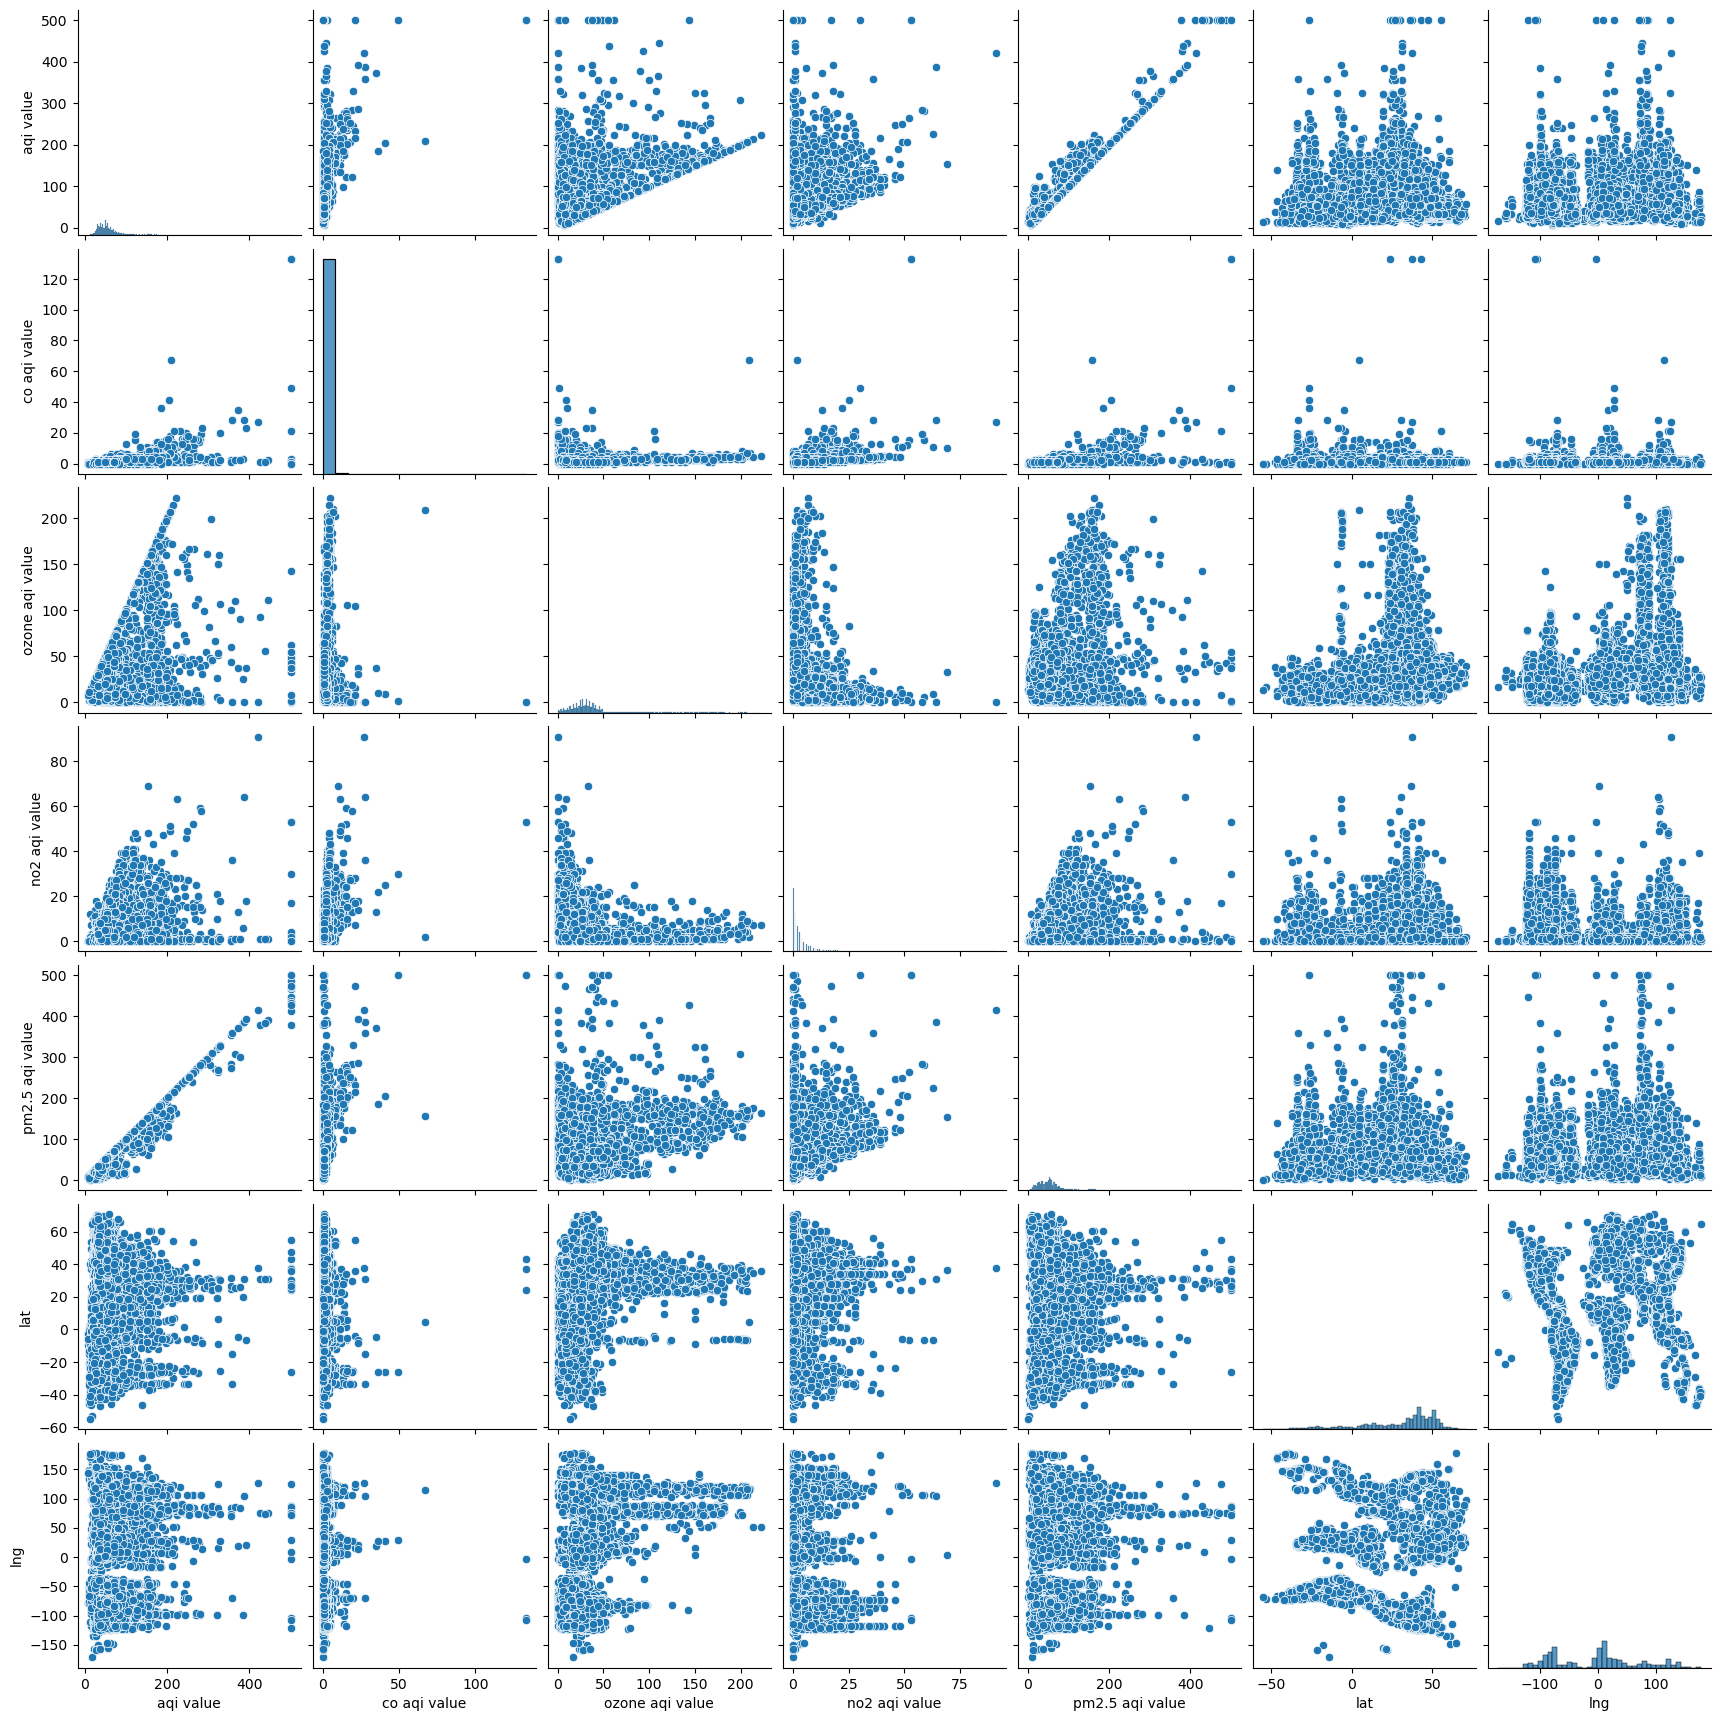

<Axes: >

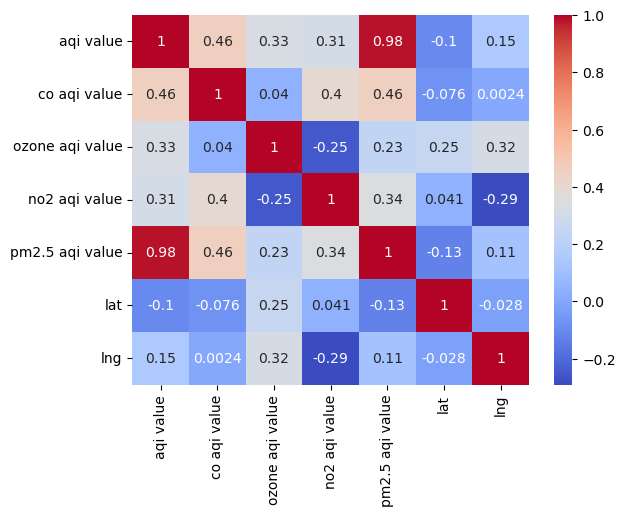

In [9]:
sns.pairplot(data)
plt.show()
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# choosing relavant features for training

In [8]:
X = data[['co aqi value', 'ozone aqi value', 'no2 aqi value', 'pm2.5 aqi value']]
y = data['aqi value']

# train- test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model training using random forest

In [11]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# model evaluation

In [12]:
y_pred=model.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean Absolute Error: 0.08944893680742742
Mean Squared Error: 2.5933745732255167
R2 score: 0.9984363282525895


# plotting result

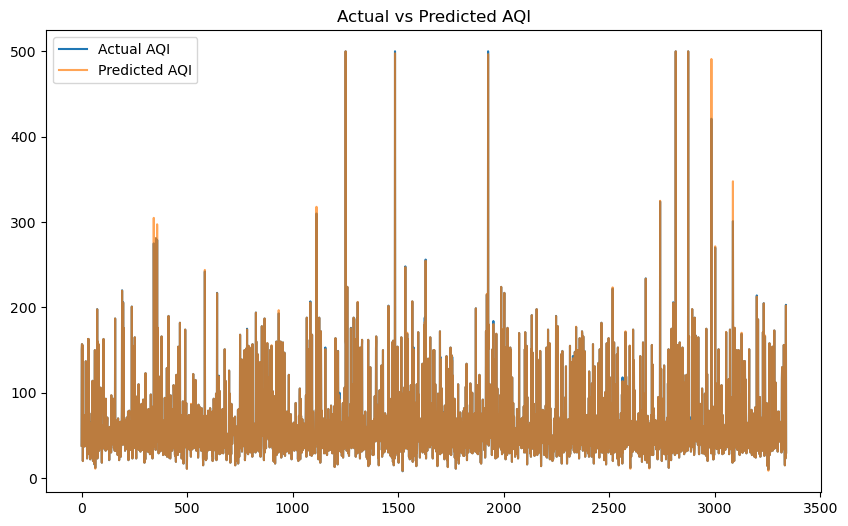

In [13]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values,label="Actual AQI")
plt.plot(y_pred,label='Predicted AQI',alpha=0.7)
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()